

```
# This is formatted as code
```

# **1- Import Dependencies**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2 - Exploratory Data Analysis (EDA)**

**2.1 - Load the Data**

In [57]:
hotel_df = pd.read_csv("hotel.csv")
pd.set_option('display.max_columns', None)
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [58]:
# number of rows and columns
print(f"shape of our data: {hotel_df.shape}")

# Check the data types of each column
print("\nData types of each column:")
print(hotel_df.dtypes)

# if you don't understand the meaning of each column, you can look for the description in my github repo (;

shape of our data: (119390, 32)

Data types of each column:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type    

In [59]:
# Check for missing values across all columns
print(hotel_df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

As we can notice:
- children column has 4 missing values.
- country column has 488 missing values.
- agent column has 16340 missing values.
- company column has 112593 missing values.

We will handle all of these missing values once we reach preprocessing phase.

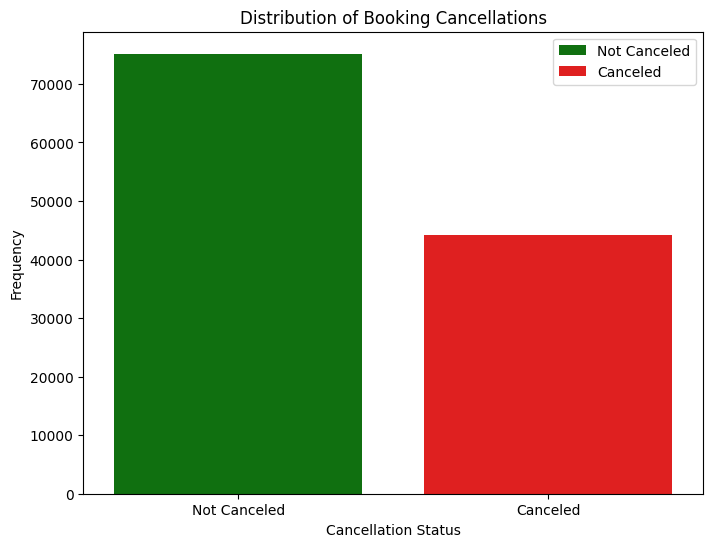

Percentage of bookings:
is_canceled
0    63
1    37
Name: proportion, dtype: int64


In [60]:
# Now we will look for the distribution of our target column (is_canceled)

# Create a count plot with Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='is_canceled', hue='is_canceled', data=hotel_df, palette=['green', 'red'])
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.xlabel('Cancellation Status')
plt.ylabel('Frequency')
plt.title('Distribution of Booking Cancellations')
plt.legend(labels=['Not Canceled', 'Canceled'])
plt.show()

# Calculate the percentage of canceled vs. non-canceled bookings
percentages = hotel_df['is_canceled'].value_counts(normalize=True) * 100

# Round the percentages to the nearest integer
rounded_percentages = percentages.round().astype(int)

# Print the rounded percentages
print("Percentage of bookings:")
print(rounded_percentages)

As we can see, the histogram shows a skewed distribution for is_canceled, with 63% of bookings not canceled (0) and 37% canceled (1). This imbalance may bias our DNN toward predicting non-cancellations, impacting its ability to identify cancellations effectively. To address this, we will use the class weighting technique in preprocessing to give more importance to the minority class (canceled = 1).

**2.2 - visualize the distribution of numerical features and create box plots for them**

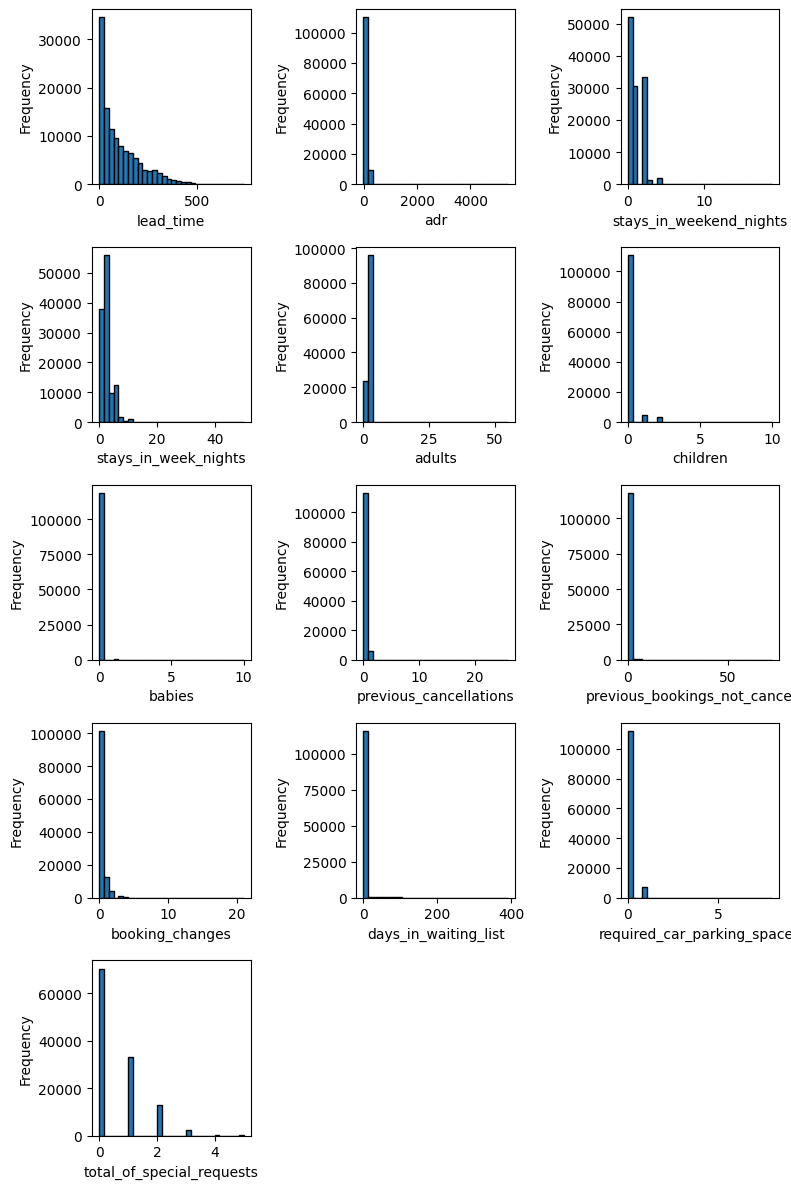

In [61]:
# Now we will visualize the distribution of numerical features to identify skewness or outliers.
# List of numerical features to visualize
numerical_features = [
    'lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
    'required_car_parking_spaces', 'total_of_special_requests'
]

# Create histograms for each numerical feature
plt.figure(figsize=(8, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)  # 5 rows, 3 columns
    plt.hist(hotel_df[feature], bins=30, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Real-Life Description of the Data

- **lead_time**: Days between booking and arrival; mostly short (0–100 days), some planned far ahead (up to 700 days).
- **adr**: Average daily rate; typically $0–$100, with rare luxury bookings above $400.
- **stays_in_weekend_nights**: Weekend nights stayed; usually 0–2, with occasional longer stays (up to 10).
- **stays_in_week_nights**: Weekday nights stayed; often 0–5, with rare extended stays (up to 40).
- **adults**: Number of adults per booking; mostly 1–2, rarely more than 4.
- **children**: Children per booking; mostly 0, rarely above 2.
- **babies**: Babies per booking; almost always 0, very rarely 1–2.
- **previous_cancellations**: Past cancellations by guests; mostly 0, rarely above 1.
- **previous_bookings_not_canceled**: Past non-canceled bookings; mostly 0, some repeat guests (up to 50).
- **booking_changes**: Changes to bookings; typically 0, rarely above 5.
- **days_in_waiting_list**: Days on waiting list; mostly 0, rarely over 50.
- **required_car_parking_spaces**: Parking spaces needed; mostly 0, rarely 1–2.
- **total_of_special_requests**: Special requests made; usually 0–1, rarely above 3.

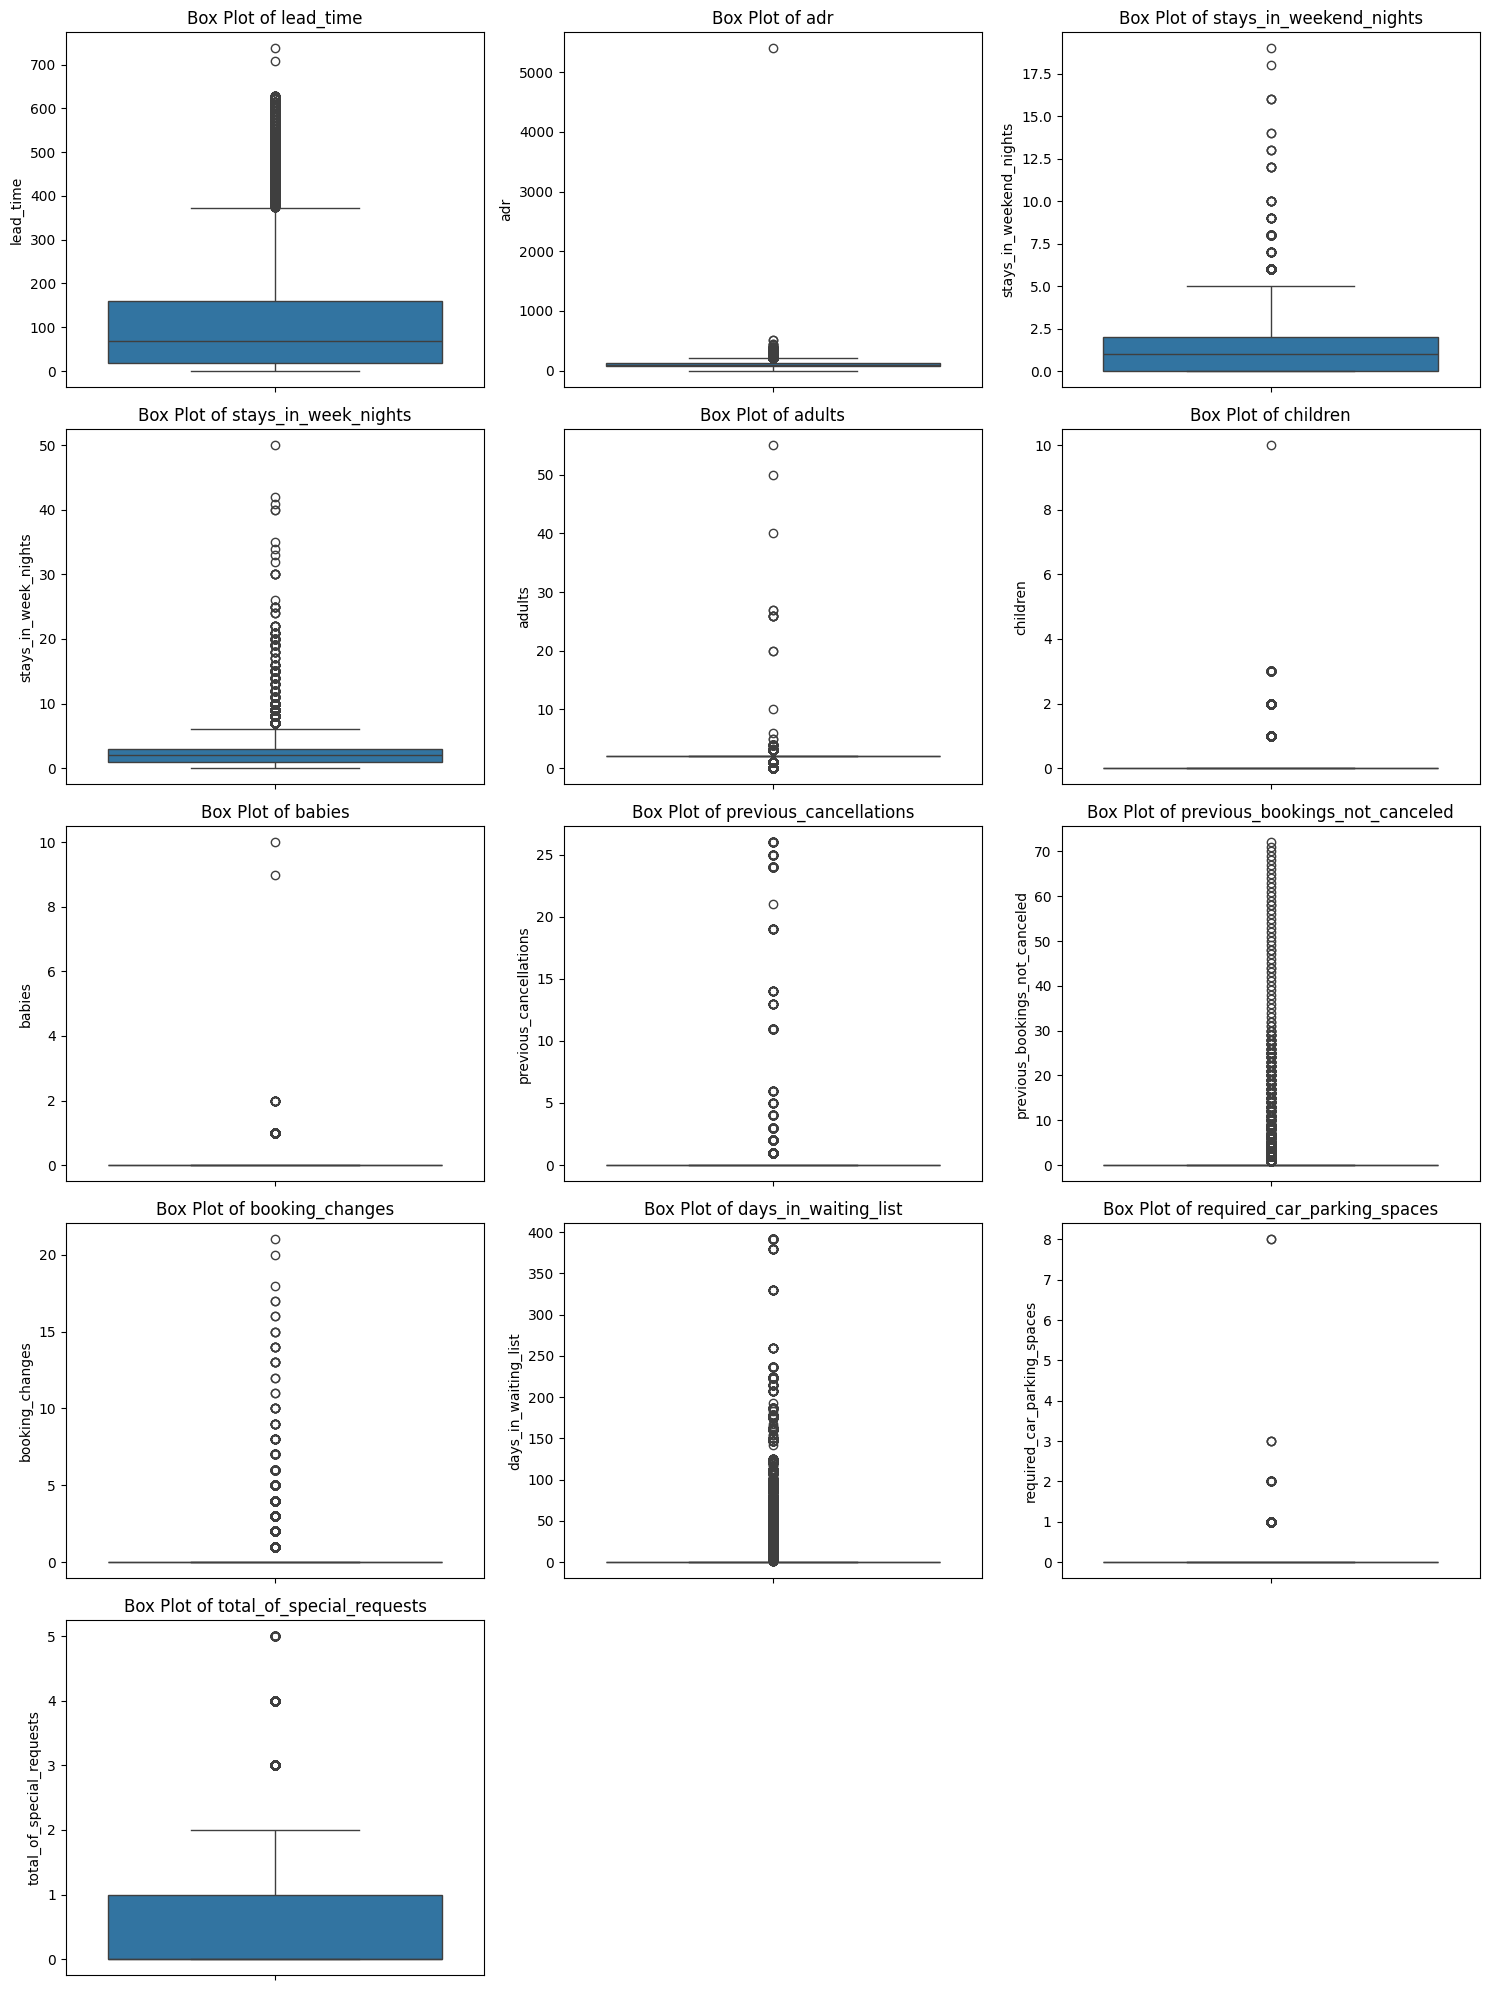

In [62]:
# Create box plots for each numerical feature
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)  # 5 rows, 3 columns
    sns.boxplot(y=hotel_df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


- **Box Plot of lead_time**:
  - **Median**: Around 50 days.
  - **IQR (Interquartile Range)**: From about 10 to 150 days (box edges), showing most bookings are made 10–150 days in advance.
  - **Whiskers**: Extend to roughly 0 and 300 days, covering the typical range.
  - **Outliers**: Many above 300, with some as high as 700, indicating rare early bookings.

- **Box Plot of adr**:
  - **Median**: Around 100 dollars.
  - **IQR**: Roughly 50 to 150 dollars, showing most rates are in this range.
  - **Whiskers**: Extend to about 0 and 250 dollars.
  - **Outliers**: Many above 250 dollars, with some exceeding 5000 dollars, suggesting luxury bookings or errors.

- **Box Plot of stays_in_weekend_nights**:
  - **Median**: Around 1 night.
  - **IQR**: From 0 to 2 nights, indicating most stays include 0–2 weekend nights.
  - **Whiskers**: Extend to 0 and 4 nights.
  - **Outliers**: Values above 4, up to 15–17, showing rare longer weekend stays.

- **Box Plot of stays_in_week_nights**:
  - **Median**: About 2 nights.
  - **IQR**: From 1 to 3 nights, covering most weekday stays.
  - **Whiskers**: Extend to 0 and 5 nights.
  - **Outliers**: Many above 5, with some up to 50, indicating rare extended stays.

- **Box Plot of adults**:
  - **Median**: 2 adults.
  - **IQR**: From 1 to 2 adults, showing most bookings are for 1–2 adults.
  - **Whiskers**: Extend to 1 and 3 adults.
  - **Outliers**: Values above 3, up to 50, likely group bookings or errors.

- **Box Plot of children**:
  - **Median**: 0 children.
  - **IQR**: 0 to 0, reflecting most bookings have no children.
  - **Whiskers**: Extend to 0 and 1.
  - **Outliers**: Values above 1, up to 10, indicating rare family bookings.

- **Box Plot of babies**:
  - **Median**: 0 babies.
  - **IQR**: 0 to 0, as most bookings have no babies.
  - **Whiskers**: Extend to 0 and 0.
  - **Outliers**: Rare values above 0, up to 10, showing very few bookings with babies.

- **Box Plot of previous_cancellations**:
  - **Median**: 0 cancellations.
  - **IQR**: 0 to 0, indicating most guests have no prior cancellations.
  - **Whiskers**: Extend to 0 and 0.
  - **Outliers**: Values above 0, up to 25, reflecting rare habitual cancellers.

- **Box Plot of previous_bookings_not_canceled**:
  - **Median**: 0 prior bookings.
  - **IQR**: 0 to 0, showing most guests are not repeat visitors.
  - **Whiskers**: Extend to 0 and 0.
  - **Outliers**: Values above 0, up to 70, indicating some frequent guests.

- **Box Plot of booking_changes**:
  - **Median**: 0 changes.
  - **IQR**: 0 to 0, as most bookings have no changes.
  - **Whiskers**: Extend to 0 and 1.
  - **Outliers**: Values above 1, up to 20, showing rare frequent changes.

- **Box Plot of days_in_waiting_list**:
  - **Median**: 0 days.
  - **IQR**: 0 to 0, indicating most bookings are not on a waiting list.
  - **Whiskers**: Extend to 0 and 0.
  - **Outliers**: Values above 0, up to 400, reflecting rare waiting periods.

- **Box Plot of required_car_parking_spaces**:
  - **Median**: 0 spaces.
  - **IQR**: 0 to 0, as most bookings require no parking.
  - **Whiskers**: Extend to 0 and 0.
  - **Outliers**: Values above 0, up to 8, indicating rare parking needs.

- **Box Plot of total_of_special_requests**:
  - **Median**: Around 0–1 requests.
  - **IQR**: From 0 to 1, showing most bookings have 0–1 special requests.
  - **Whiskers**: Extend to 0 and 2.
  - **Outliers**: Values above 2, up to 5, reflecting rare high-request bookings.

**2.3 Identify Feature Types**

In [63]:
"""Because DNN require numerical inputs — so we must know which features will
need encoding later."""
# Separate features into numerical and categorical
# numerical_features is already done
categorical_features = hotel_df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
Categorical Features: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


**2.4 Describe Numerical Features (Statistics)**

In [64]:
hotel_df[numerical_features].describe()

,lead_time,adr,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,101.831122,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,2.321149,0.062518,0.571363
std,106.863097,50.535790,0.998613,1.908286,0.579261,0.398561,0.097436,0.844336,1.497437,0.652306,17.594721,0.245291,0.792798
min,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,69.290000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,94.575000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,160.000000,126.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,737.000000,5400.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,8.000000,5.000000


# **3 - Data preprocessing**

**3.1 handle missing values**

In [65]:
# Check for missing values across all columns
print(hotel_df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

3.1.1 handle company column

In [66]:
# The company column has over 94% missing values. It likely represents
# individual bookings, not companies. Therefore, we drop it to avoid adding
# noise to the model.
hotel_df = hotel_df.drop('company', axis=1)

3.1.2 handle country & agent columns

In [67]:
# We will fill agent missing values with 0. Why 0? Because it’s a neutral
# number, and we can treat it as "direct booking" later if needed.
hotel_df = hotel_df['agent'].fillna(0)

In [68]:
# For country, we fill missing values with the most frequent country (mode).
hotel_df = hotel_df['country'].fillna(hotel_df['country'].mode()[0])

KeyError: 'country'